__Bag of Words__

In [86]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt


In [7]:
#reading file
filename = 'SNA_Res_100_pdfs_combinedTxt.txt'
file = open(filename, encoding = "utf8")
text = file.read()
file.close()


In [8]:
#delimiting words
words = text.split()
print(words[:100])

['\ufeffOn', 'Service', 'Resilience', 'in', 'Cloud-Native', '5G', 'Mobile', 'Systems', 'Tarik', 'Taleb,', 'Senior', 'Member,', 'IEEE,', 'Adlen', 'Ksentini,', 'Senior', 'Member,', 'IEEE,', 'and', 'Bruno', 'Sericola', 'Abstract—To', 'cope', 'with', 'the', 'tremendous', 'growth', 'in', 'mobile', 'data', 'traffic', 'on', 'one', 'hand,', 'and', 'the', 'modest', 'average', 'revenue', 'per', 'user', 'on', 'the', 'other', 'hand,', 'mobile', 'operators', 'have', 'been', 'exploring', 'network', 'virtualization', 'and', 'cloud', 'computing', 'technologies', 'to', 'build', 'cost-', 'efficient', 'and', 'elastic', 'mobile', 'networks', 'and', 'to', 'have', 'them', 'offered', 'as', 'a', 'cloud', 'service.', 'In', 'such', 'cloud-based', 'mobile', 'networks,', 'ensur-', 'ing', 'service', 'resilience', 'is', 'an', 'important', 'challenge', 'to', 'tackle.', 'Indeed,', 'high', 'availability', 'and', 'service', 'reliability', 'are', 'important', 'require-', 'ments', 'of', 'carrier']


In [28]:
#removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

array = np.array(words)
df = pd.DataFrame(array, columns = ['Words'])

filtered = df['Words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [38]:
#removing blank rows

nan_value = float("NaN")
filtered.replace("",nan_value,inplace =True)
filtered.dropna(inplace = True)


In [40]:
#filter commas out

filtered.replace(',','', regex=True, inplace=True)


In [91]:
#Getting the words with highest frequency
ranked_words = filtered.value_counts()
top = pd.DataFrame(data = ranked_words)
top.rename(columns ={"Words": "Frequency"},inplace = True)
top



,Frequency
network,3121
The,2955
social,2649
&,1672
et,1585
...,...
Kim.,1
rounded,1
Exposed:,1
Twitter-centric,1


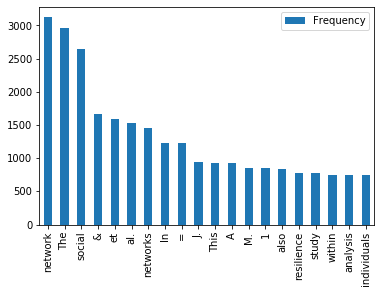

In [92]:
#quick bar graph representation
graph = top.iloc[0:20].plot.bar()